# Creating and Backtesting Stochastic Oscillator Strategies

## Getting the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
pd.read_csv("EURUSD_ohlc.csv")

,Unnamed: 0,Open,High,Low,Close
0,2008-01-01,1.45905,1.47502,1.45885,1.47146
1,2008-01-02,1.47146,1.47812,1.46876,1.47510
2,2008-01-03,1.47504,1.48254,1.46958,1.47429
3,2008-01-05,1.47451,1.47559,1.47430,1.47465
4,2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...,...
3806,2020-12-23,1.21873,1.22158,1.21774,1.21849
3807,2020-12-27,1.21892,1.22504,1.21812,1.22152
3808,2020-12-28,1.22145,1.22752,1.22086,1.22502
3809,2020-12-29,1.22508,1.23102,1.22495,1.23000


In [3]:
data = pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3811 entries, 2008-01-01 to 2020-12-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3811 non-null   float64
 1   High    3811 non-null   float64
 2   Low     3811 non-null   float64
 3   Close   3811 non-null   float64
dtypes: float64(4)
memory usage: 148.9 KB


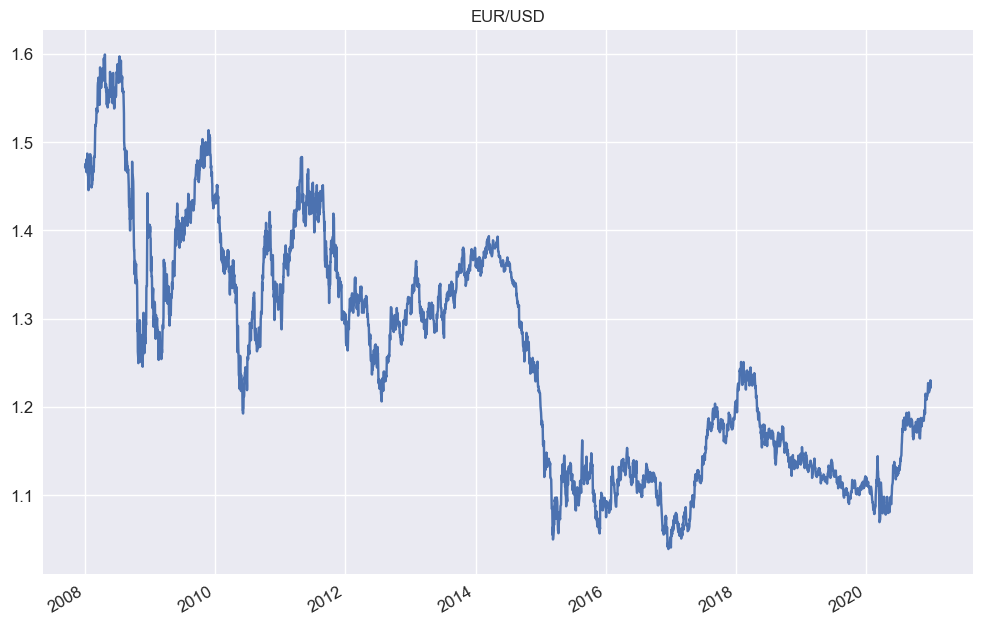

In [5]:
data.Close.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12)
plt.show()

## Defining an SO Strategy

In [4]:
data

,Open,High,Low,Close
2008-01-01,1.45905,1.47502,1.45885,1.47146
2008-01-02,1.47146,1.47812,1.46876,1.47510
2008-01-03,1.47504,1.48254,1.46958,1.47429
2008-01-05,1.47451,1.47559,1.47430,1.47465
2008-01-06,1.47465,1.47560,1.46586,1.46954
...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849
2020-12-27,1.21892,1.22504,1.21812,1.22152
2020-12-28,1.22145,1.22752,1.22086,1.22502
2020-12-29,1.22508,1.23102,1.22495,1.23000


The __Stochastic Oscillator Indicator__ consists of two different lines/oscillators that are bounded by __0 and 100__: <br>
- __Fast Stochastic Indicator__ (%K line)
- __Slow Stochastic Indicator__ (%D line)

__How to calculate %K__

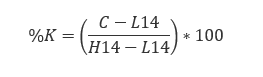

where: <br>
C = the most recent closing price <br>
L14: the minimum price in the last 14 days<br>
H14: the maximum price in the last 14 days

In [5]:
periods = 14

In [6]:
data["roll_low"] = data.Low.rolling(periods).min()

In [7]:
data["roll_high"] = data.High.rolling(periods).max()

In [8]:
data

,Open,High,Low,Close,roll_low,roll_high
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN
...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102


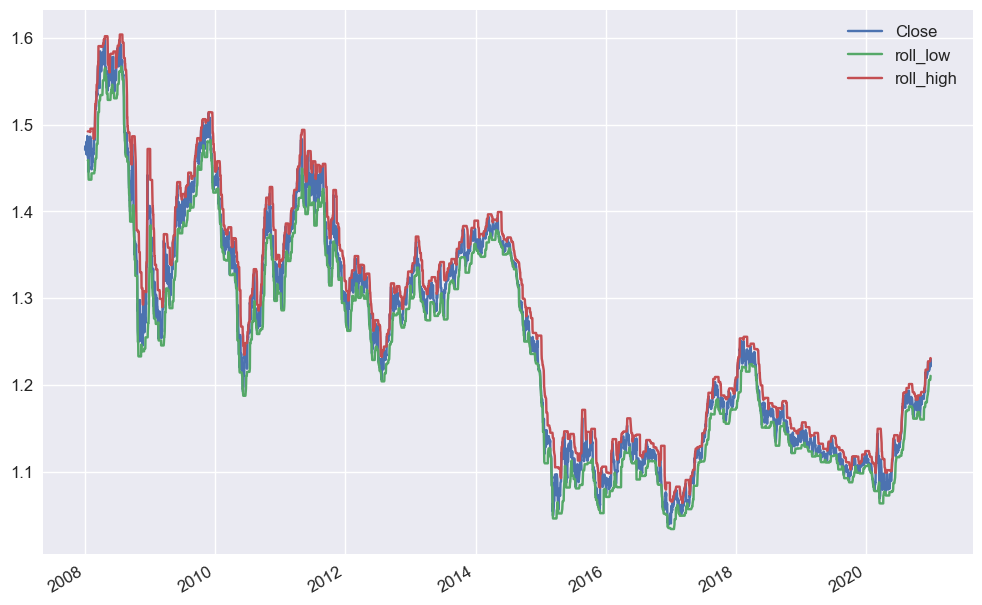

In [9]:
data.loc[:, ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

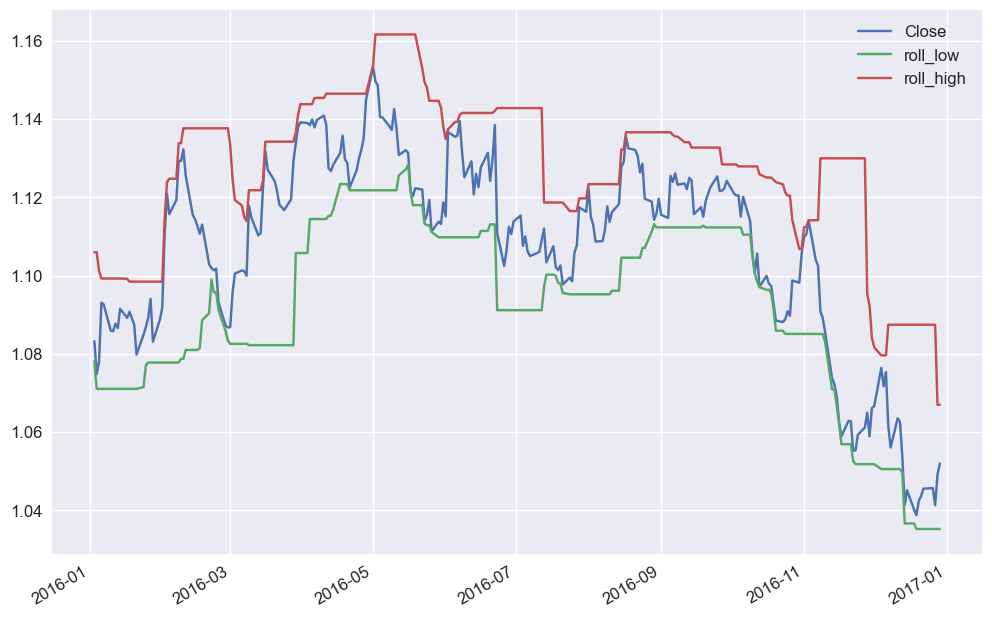

In [10]:
data.loc["2016", ["Close", "roll_low", "roll_high"]].plot(figsize = (12, 8), fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [11]:
data["K"] = (data.Close - data.roll_low) / (data.roll_high - data.roll_low) * 100

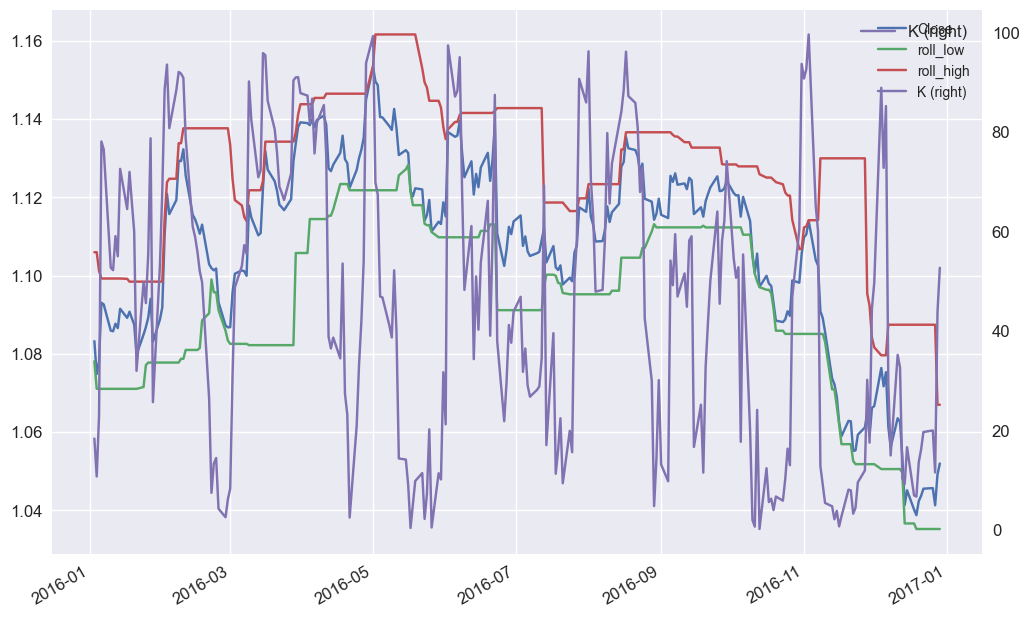

In [12]:
data.loc["2016", ["Close", "roll_low", "roll_high", "K"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "K")
plt.legend(fontsize = 12)
plt.show()

In [13]:
moving_av = 3

In [14]:
data["D"] = data.K.rolling(moving_av).mean()

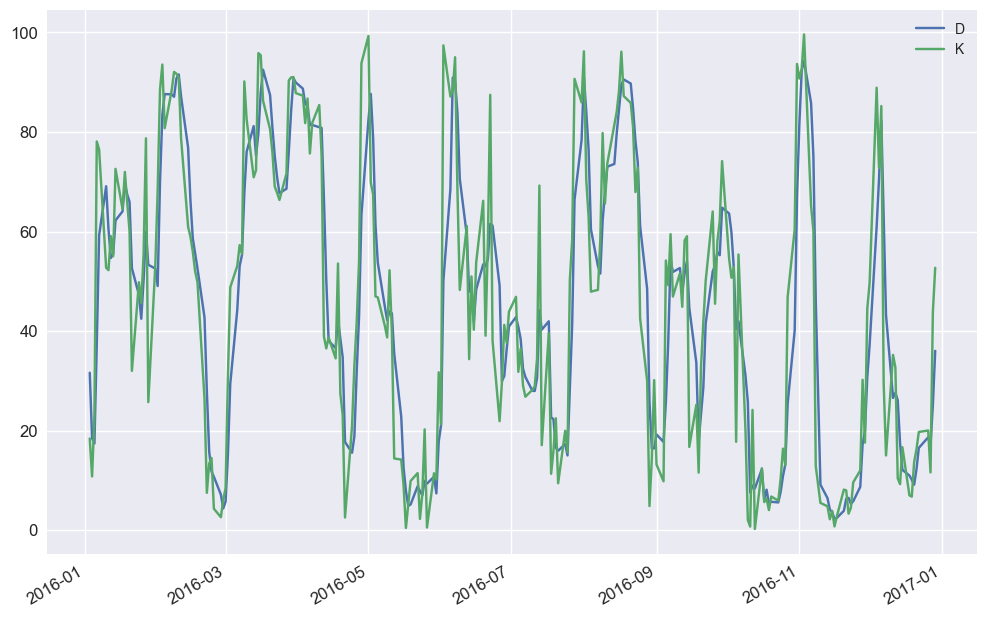

In [15]:
data.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

In [16]:
data["position"] = np.where(data["K"] > data["D"], 1, -1)

In [17]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1


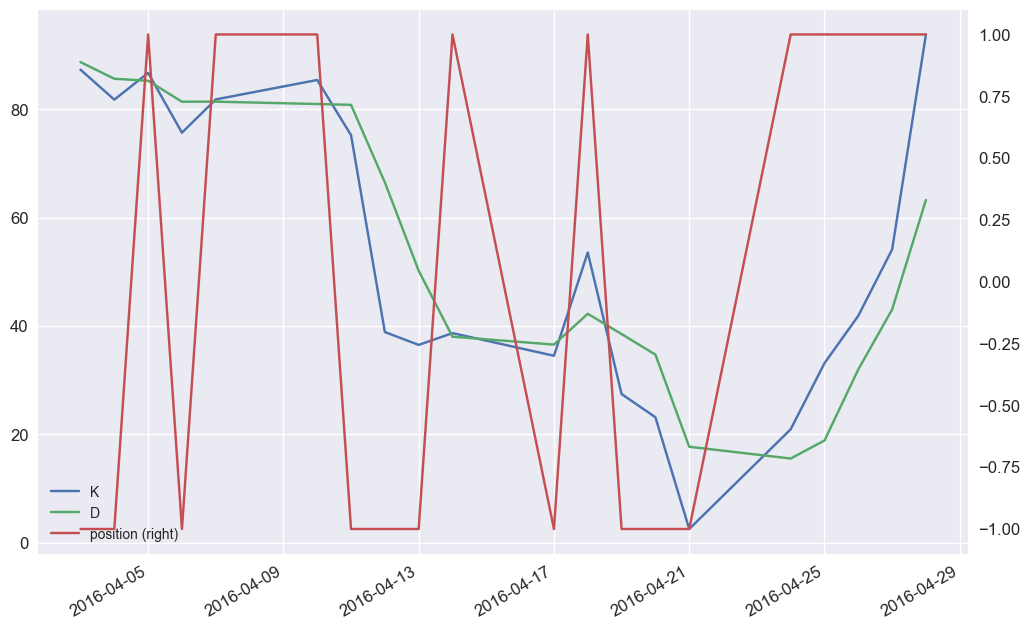

In [18]:
data.loc["04-2016", ["K", "D", "position"]].plot(figsize = (12, 8), fontsize = 12, secondary_y = "position")
plt.show()

## Vectorized Strategy Backtesting

In [19]:
data

,Open,High,Low,Close,roll_low,roll_high,K,D,position
2008-01-01,1.45905,1.47502,1.45885,1.47146,NaN,NaN,NaN,NaN,-1
2008-01-02,1.47146,1.47812,1.46876,1.47510,NaN,NaN,NaN,NaN,-1
2008-01-03,1.47504,1.48254,1.46958,1.47429,NaN,NaN,NaN,NaN,-1
2008-01-05,1.47451,1.47559,1.47430,1.47465,NaN,NaN,NaN,NaN,-1
2008-01-06,1.47465,1.47560,1.46586,1.46954,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2020-12-23,1.21873,1.22158,1.21774,1.21849,1.20588,1.22728,58.925234,55.623053,1
2020-12-27,1.21892,1.22504,1.21812,1.22152,1.20588,1.22728,73.084112,63.753894,1
2020-12-28,1.22145,1.22752,1.22086,1.22502,1.20588,1.22752,88.447320,73.485555,1
2020-12-29,1.22508,1.23102,1.22495,1.23000,1.20754,1.23102,95.655877,85.729103,1


In [ ]:
data["returns"] = np.log(data.Close.div(data.Close.shift(1)))

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

In [ ]:
data["strategy"] = data.position.shift(1) * data["returns"]

In [ ]:
data

In [ ]:
data.dropna(inplace = True)

In [ ]:
ptc = 0.00007

In [ ]:
data["trades"] = data.position.diff().fillna(0).abs()

In [ ]:
data.trades.value_counts()

In [ ]:
data["strategy_net"] = data.strategy - data.trades * ptc

In [ ]:
data["creturns"] = data["returns"].cumsum().apply(np.exp)
data["cstrategy"] = data["strategy"].cumsum().apply(np.exp)
data["cstrategy_net"] = data["strategy_net"].cumsum().apply(np.exp)

In [ ]:
data

In [ ]:
data[["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

In [ ]:
data.loc["2020", ["creturns", "cstrategy", "cstrategy_net"]].plot(figsize = (12 , 8))
plt.show()

## Using the SOBacktester Class

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")

In [ ]:
from SOBacktester import SOBacktester as SO

In [ ]:
pd.read_csv("EURUSD_ohlc.csv", parse_dates = [0], index_col = 0)

In [ ]:
pd.read_csv("US30_ohlc.csv", parse_dates = [0], index_col = 0)

In [ ]:
pd.read_csv("XAUUSD_ohlc.csv", parse_dates = [0], index_col = 0)

In [ ]:
ptc = 0.00007

In [ ]:
tester = SO("EURUSD", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [ ]:
tester

In [ ]:
tester.data

In [ ]:
tester.test_strategy()

In [ ]:
tester.results

In [ ]:
tester.plot_results()

In [ ]:
tester.results.trades.value_counts()

In [ ]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

In [ ]:
tester.plot_results()

In [ ]:
tester.results.trades.value_counts()

__XAU / USD__

In [ ]:
ptc = 0.00015

In [ ]:
tester = SO("XAUUSD", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

In [ ]:
tester.plot_results()

__US30__

In [ ]:
ptc = 0.00007

In [ ]:
tester = SO("US30", 14, 3, "2008-01-01", "2020-12-31", ptc)

In [ ]:
tester.data

In [ ]:
tester.test_strategy()

In [ ]:
tester.plot_results()

In [ ]:
tester.optimize_parameters((10, 100, 1), (3, 50, 1))

In [ ]:
tester.plot_results()

## Alternative Strategies and Interpretations

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import brute
plt.style.use("seaborn-v0_8")
from SOBacktester import SOBacktester as SO

In [ ]:
tester = SO("EURUSD", 27, 11, "2008-01-01", "2020-12-31", 0)

In [ ]:
alt = tester.data.dropna()
alt

__Main Strategy: Fast Stochastic (%K) / Slow Stochastic (%D) Crossover__

In [ ]:
alt.loc["2016", ["D", "K"]].plot(figsize = (12, 8), fontsize = 12)
plt.show()

__Alternative 1: 50-Level Crossover__

In [ ]:
alt2 = alt.loc["2016"].copy()

In [ ]:
alt2.loc[:, "K"].plot(figsize = (12, 8))
plt.hlines(y = 50, xmin = alt2.index[0], xmax = alt2.index[-1], color = "r", label = "50-Level")
plt.title("50-Level Crossover", fontsize = 15)
plt.legend()
plt.show()

__Alternative 2: Overbought (80) & Oversold (20)__

- if __Fast Stochastic (%K)__ reaches __extreme highs__ (>80) -> __Overbought__
- if __Fast Stochastic (%K)__ reaches __extreme lows__ (<20) -> __Oversold__

In [ ]:
alt2.loc[:, ["K"]].plot(figsize = (12, 8))
plt.hlines(y = 80, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Upper", color = "r")
plt.hlines(y = 20, xmin = alt2.index[0], xmax = alt2.index[-1], label = "Lower", color = "g")
plt.yticks(ticks = range(0, 100, 10))
plt.legend()
plt.show()